# Coronavirus tweets NLP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("corona_tweets.csv")

# EDA

In [3]:
#1 Understanding data

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Drop unnecessary collumns  like UserName, Location or time since these columns does not contribute to the sentiment variable

In [5]:
df1=df[['OriginalTweet','Sentiment']]

In [6]:
df1.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
df1.tail()

,OriginalTweet,Sentiment
44950,Airline pilots offering to stock supermarket s...,Neutral
44951,Response to complaint not provided citing COVI...,Extremely Negative
44952,You know its getting tough when @KameronWilds...,Positive
44953,Is it wrong that the smell of hand sanitizer i...,Neutral
44954,@TartiiCat Well new/used Rift S are going for ...,Negative


In [8]:
df1.shape

(44955, 2)

In [11]:
df1.isnull().values.any()

False

In [16]:
df1['OriginalTweet'].duplicated().any()

False

In [24]:
df1.describe()

,OriginalTweet,Sentiment
count,44955,44955
unique,44955,5
top,TRENDING: New Yorkers encounter empty supermar...,Positive
freq,1,12369


In [27]:
df.Sentiment.unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

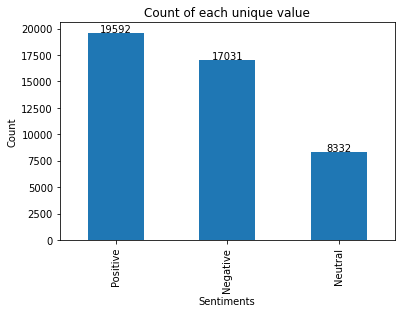

In [94]:
ax=df1['Sentiment'].value_counts().plot(kind='bar',title='Count of each unique value')
plt.ylabel('Count')
ax.set_xlabel('Sentiments')
#ax.annotate(format(bar.get_height())
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+300), ha='center', va='center')


In [90]:
df1["Sentiment"].replace({"Extremely Negative": "Negative", "Extremely Positive": "Positive"}, inplace=True)

/home/shubham/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [91]:
df1.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# EDA on Text

In [116]:
df1['totalwords']=df1['OriginalTweet'].str.split().str.len()

/tmp/ipykernel_66678/2878099809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['totalwords']=df1['OriginalTweet'].str.split().str.len()


In [117]:
df1.head()

,OriginalTweet,Sentiment,totalwords
0,TRENDING: New Yorkers encounter empty supermar...,Negative,23
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30
2,Find out how you can protect yourself and love...,Positive,13
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26


In [119]:
df1['totalwords'].describe()

count    44955.000000
mean        30.702191
std         11.625269
min          1.000000
25%         21.000000
50%         32.000000
75%         40.000000
max         64.000000
Name: totalwords, dtype: float64

In [121]:
df1['totalwords'].idxmin()

31408

In [122]:
df1['OriginalTweet'].loc[31408]

'Brazil...Health...Official...Confirm...First...Indigenous...Coronavirus...Case...Amazon...Chief...Bezos...Say...Donating...100...Food...Charity...COVID-19...Pandemic...Trump...Campaign...Demand...Jeff...Session...Campaign...End...Delusional...Invoking...Ties...President...Turkey'

/home/shubham/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalwords'>

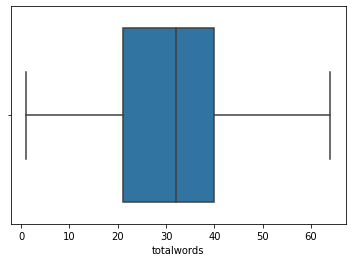

In [128]:
sns.boxplot(df1['totalwords'])

It appearse that there are no outliers present

In [134]:
# text Cleaning